In [2]:
import pandas as pd

---- Stochastic Specification of Input Data ----
              year
count   109.000000
mean   2020.853211
std       0.767701
min    2020.000000
25%    2020.000000
50%    2021.000000
75%    2021.000000
max    2022.000000
-------------------------------
---- Info of Input Data ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      109 non-null    object
 1   year      109 non-null    int64 
 2   city      109 non-null    object
 3   state     109 non-null    object
 4   vic_name  109 non-null    object
 5   vic_age   109 non-null    object
 6   dog_type  109 non-null    object
 7   desc      109 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.9+ KB
None
-------------------------------
---- shape of Input Data ----
number of samples: 109
number of features: 8


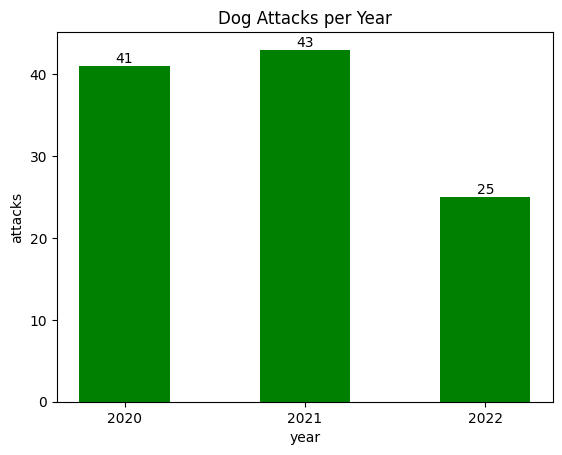

number of attacks per month in year 2020 is month
January      5
February     5
March        2
April        3
May          4
June         5
July         3
August       3
September    2
October      5
November     1
December     3
Name: count, dtype: int64


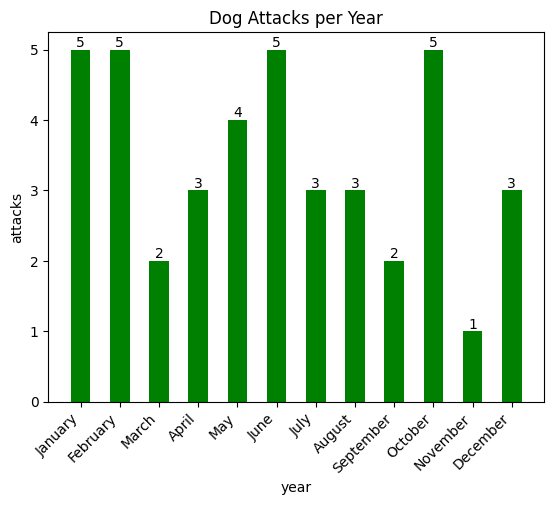

number of attacks per month in year 2021 is month
January      1
February     2
March        2
April        3
May          7
June         3
July         5
August       4
September    4
October      4
November     3
December     5
Name: count, dtype: int64


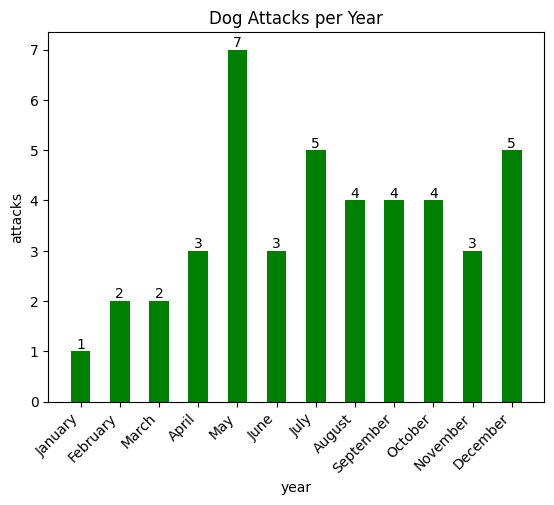

number of attacks per month in year 2022 is month
January      3.0
February     3.0
March        4.0
April        5.0
May          2.0
June         1.0
July         1.0
August       3.0
September    NaN
October      3.0
November     NaN
December     NaN
Name: count, dtype: float64


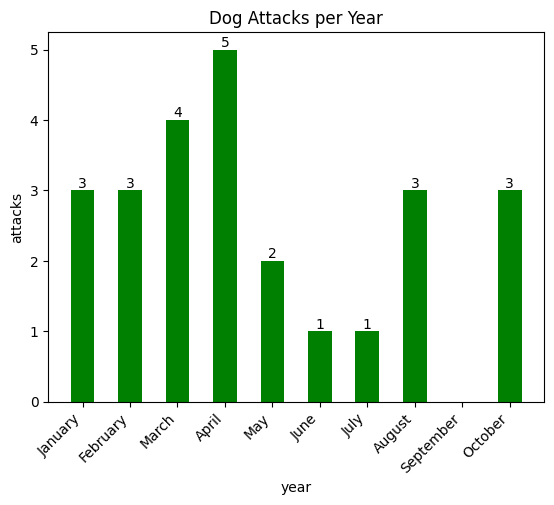

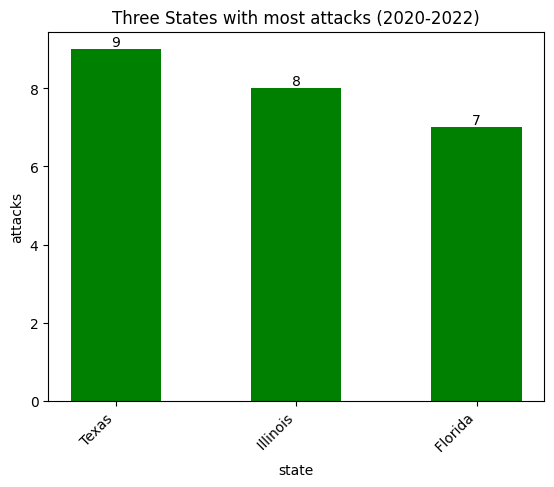

exception is not enough values to unpack (expected 2, got 1), <undisclosed>(infant) ,26,years
exception is not enough values to unpack (expected 2, got 1), <undisclosed> ,46,years
exception is not enough values to unpack (expected 2, got 1), <undisclosed> ,27,years
exception is too many values to unpack (expected 2), <undisclosed, adult male> ,58,years
exception is too many values to unpack (expected 2), 5 months; 2 months ,61,years
exception is too many values to unpack (expected 2), <undisclosed, adult male> ,80,years


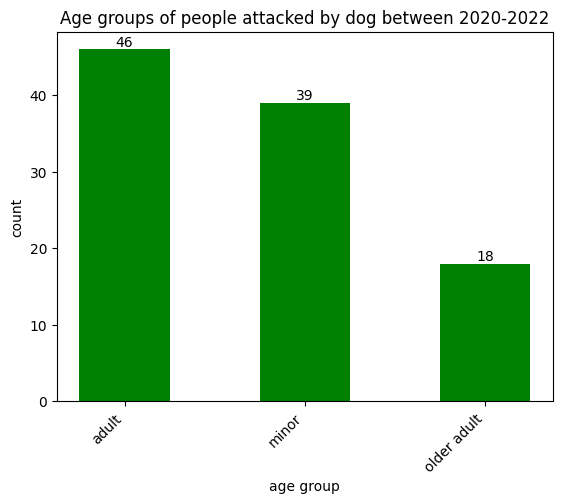

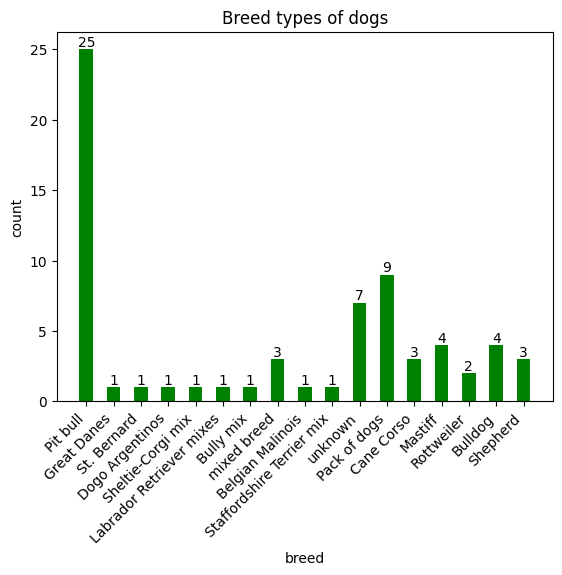

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

class Dog_Attack:
    def __init__(self, csvFilePath) -> None:
        self.csvFilePath = csvFilePath

    def extract_specific(self):
        self.df = pd.read_csv(self.csvFilePath)

        print('---- Stochastic Specification of Input Data ----')
        print(self.df.describe())

        print('-------------------------------')
        print('---- Info of Input Data ----')
        print(self.df.info())

        print('-------------------------------')
        print('---- shape of Input Data ----')
        print(f'number of samples: {self.df.shape[0]}\nnumber of features: {self.df.shape[1]}')

    def dog_attacks_per_year(self):
        years = self.df['year'].value_counts().sort_index()
        self.plot_histogram(years.index,years,'green','Dog Attacks per Year','year','attacks')
        plt.xticks(years.index, [2020, 2021,2022], rotation=0)
        plt.show()

    def attacks_per_month(self):
        months = ['January', 'February', 'March', 'April','May','June','July','August','September','October', 'November','December']
        self.df[['month', 'day']] = self.df['date'].str.split(' ', expand=True)
        df_ym = self.df.drop(['state','vic_name','vic_age','dog_type','desc','city','day','date'], axis=1)
        df_years = df_ym.groupby('year')

        years_2020 = df_years.get_group(2020)
        month_2020 = years_2020['month'].value_counts().reindex(months)
        print(f'number of attacks per month in year 2020 is {month_2020}')
        self.plot_histogram(month_2020.index,month_2020,'green','Dog Attacks per Year','year','attacks')
        plt.xticks(rotation=45, ha="right")
        plt.show()

        years_2021 = df_years.get_group(2021)
        month_2021 = years_2021['month'].value_counts().reindex(months)
        print(f'number of attacks per month in year 2021 is {month_2021}')
        self.plot_histogram(month_2021.index,month_2021,'green','Dog Attacks per Year','year','attacks')
        plt.xticks(rotation=45, ha="right")
        plt.show()

        years_2022 = df_years.get_group(2022)
        month_2022 = years_2022['month'].value_counts().reindex(months)
        print(f'number of attacks per month in year 2022 is {month_2022}')
        self.plot_histogram(month_2022.index,month_2022,'green','Dog Attacks per Year','year','attacks')
        plt.xticks(rotation=45, ha="right")
        plt.show()

    def three_states_most_attack(self):
        state_attacks = self.df['state'].value_counts().sort_values(ascending=False)
        self.plot_histogram(state_attacks.index[0:3],state_attacks[0:3],'green','Three States with most attacks (2020-2022)','state','attacks')
        plt.xticks(rotation=45, ha="right")
        plt.show()

    def age_group_attack(self):
        age_list = []
        i=0
        for age in self.df['vic_age']:    
            try:
                age_number, age_ =  age.split()        
            except Exception as e:
                print(f'exception is {e}, {age} ,{age_number},{age_}')
            else:
                if age_ == 'months':
                    age_list.append(int(age_number[0])/12)
                else:
                    age_list.append(int(age_number))
        df_age = pd.DataFrame({'age': age_list})

        result_age_group = self.get_num_people_by_age_category(df_age)
        age_group = result_age_group['age_group'].value_counts()
        self.plot_histogram(age_group.index,age_group.values,'green','Age groups of people attacked by dog between 2020-2022'
                            ,'age group','count')
        plt.xticks(rotation=45, ha="right")
        plt.show()
    
    def get_num_people_by_age_category(self,df):
        df["age_group"] = pd.cut(x=df['age'], bins=[0,17,65,120], labels=["minor","adult","older adult"])
        return df  
    
    def attacks_by_breed(self):
        result = list(self.df['dog_type'].unique())
        breed_list = list(self.df['dog_type'].unique())
        breed_type_dict = {'Pit bull':0,'Great Danes':1,'St. Bernard':1, 'Dogo Argentinos':1,'Sheltie-Corgi mix':1,
                        'Labrador Retriever mixes':1,'Bully mix':1,'mixed breed':0,'Belgian Malinois':1,'Staffordshire Terrier mix':1,
                        'unknown':0, 'Pack of dogs':0, 'Cane Corso':0,'Mastiff':0, 'Rottweiler':0, 'Bulldog':0, 'Shepherd':0,}
        for breed in breed_list:
            if 'pit bull' in breed.lower():
                breed_type_dict['Pit bull'] += 1
            elif breed in ['<unreleased> (4)','<unspecified> (4)','<unspecified>','<unspecified> (5+)','Unknown breed','<unknown> (1+)', '<undisclosed>']:
                breed_type_dict['unknown'] += 1
            elif breed in ['Pack of dogs (2)','Pack of 7 dogs','Pack of dogs','Pack of feral dogs', 'Pack of 4 dogs(Hound, German Shepherd, Black Mouth Cur)', 'Pack of mixed breed dogs','Pack of 3 dogs','Pack of 3 dogs','Pack of Border Collie mixes and Shepherd mixes (6)','Pack of 5 dogs']:
                breed_type_dict['Pack of dogs'] += 1
            elif breed in ['Cane Corso','Cane Corso-mix, Husky-mix','Cane Corso (4)']:
                breed_type_dict['Cane Corso'] += 1
            elif breed in ['English Mastiff & German Shepherd','French Mastiff-mix','Neapolitan Mastiffs (2)','Mastiff']:
                breed_type_dict['Mastiff'] += 1
            elif breed in ['French Bulldog mix, possibly a Shorty Bull','American Bulldog','American Bulldog / Great Pyrenees mix','English Bulldogs (5)']:
                breed_type_dict['Bulldog'] += 1
            elif breed in ['German Shepherd','2 German Shepherds','Dutch Shepherd']:
                breed_type_dict['Shepherd'] += 1
            elif breed in ['Rottweiler (2)','Rottweiler']:
                breed_type_dict['Rottweiler'] += 1    
            elif 'mixed breed'in breed.lower():
                breed_type_dict['mixed breed'] += 1

        self.plot_histogram(breed_type_dict.keys(),
                            breed_type_dict.values(),
                            'green',
                            'Breed types of dogs',
                            'breed',
                            'count')
        plt.xticks(rotation=45, ha="right")
        plt.show()
    
    def plot_histogram(self, x_values, y_values, color, title, xlabel, ylabel):
        fig,ax = plt.subplots()
        eu = ax.bar(x_values, y_values,  color = color,
                width = 0.5)
        ax.bar_label(eu)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel) 
        

dog_attack = Dog_Attack('dog_attacks.csv')
dog_attack.extract_specific()
dog_attack.dog_attacks_per_year() 
dog_attack.attacks_per_month() 
dog_attack.three_states_most_attack()
dog_attack.age_group_attack()
dog_attack.attacks_by_breed()